### Importing needed libraries and data

In [12]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# modules needed for instance-based learning
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
np.set_printoptions(suppress=True)

# import trainig, validation and test sets
X_train_df = pd.read_csv('data/X_train.csv',header=None,skiprows=1,index_col=0)
x_test_df = pd.read_csv('data/x_test.csv',header=None,skiprows=1,index_col=0)

y_train_df = pd.read_csv('data/y_train.csv',header=None,skiprows=1,index_col=0)
y_test_df = pd.read_csv('data/y_test.csv',header=None, skiprows=1,index_col=0)

# conversions from data frames to lists
X_train = (X_train_df.values).tolist()
x_test = (x_test_df.values).tolist()

y_train = sum(((y_train_df.values).tolist()),[])
y_test = sum(((y_test_df.values).tolist()),[])


### Scaling

K-Nearest Neighbor is one of the instance-based algorithms that classifies data based on the proximity to its K number of neighbors. Given that the performance of KNN depends heavily on the distance among features, the unit/range difference among the attributes must be rescaled.

Three types of scaling were compared in the following section, including standard normalization, min-max scaling and robust scaling (code adapated from: [1] scaling tutorial: https://medium.datadriveninvestor.com/increase-10-accuracy-with-re-scaling-features-in-k-nearest-neighbors-python-code-677d28032a45, [2] sklearn min-max scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html, and [3] sklearn robust scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

1. standard normalization: rescale the data to transform it into an approximate normal distribution, where:
        X_scaled = (X - X.mean) / sigma)
        sigma = std(X)

In [13]:
# 1. standard normalization ===========================
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

X_train_sn = (X_train - mu)/sigma
x_test_sn = (x_test - mu)/sigma
print ("standard normalization finished")

standard normalization finished


2. min-max scaling: rescale the data with the min and max values, where:
        X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        X_scaled = X_std * (max - min) + min

In [14]:
# 2. min-max scaling ====================================
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_mm = scaler.transform(X_train)
scaler.fit(x_test)
x_test_mm = scaler.transform(x_test)
print ("min-max scaling finished")

min-max scaling finished


3. robust scaling: rescale the data with the median and quantile values to avoid the prescence of outliers, where:
        x_scaled = (X - Q1)/(Q3 - Q1)

In [15]:
# 3. robust scaling =====================================
scaler = RobustScaler()
scaler.fit(X_train)
X_train_rs = scaler.transform(X_train)
scaler.fit(x_test)
x_test_rs = scaler.transform(x_test)
print("robust scaling finished")

robust scaling finished


### Accuracy Assessment

The accuracy of a classification algorithm is equal to the proportion of examples that the classifier predicted correctly. Evaluating the accuracy on the training set is pointless because this will always be 1 by definition, and therefore, accuracy assessment is performed on the training data.

In [16]:
def accuracy(y_ohe, ys_hat):
    res = 0
    for y, y_hat in zip(y_ohe, ys_hat):
        if y == y_hat:
            res += 1
    res /= len(y_ohe)
    return res

### Instance-based Learning (KNN)

K-nearest neighbors (KNN) is one of the algorithms in the instance-based family that has been successfully applied to many classification problems. The performance of KNN involves the tuning of its hyper-parameters, including the weight, the number of neighbors and the type of distance metric used. The most suitable hyper-parameters need to be identified before training the algorithm.

Step 1: Define potential values for the hyper-parameters. These values were extracted from the list of allowable values provided by Scikit-Learn. 

KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

In [17]:
knn_hparams = [{'weights': ["uniform", "distance"],'n_neighbors': range(1,20,2),
               'metric':['euclidean', 'manhattan', 'cosine']}]

Step 2: Search for the most suitable hyper-parameters via gridSeachCV, which is capable of providing a list of best-found hyper-parameters (best_params) and the associated mean cross-validated score (best_score). The implementation of gridSearchCV was adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 


In [18]:
# KNN hyper-parameter tunning
# 1. Tunning with standard normalized data
knn_clf = KNeighborsClassifier()
knn_search = GridSearchCV(estimator=knn_clf, param_grid=knn_hparams,cv=5)
knn_search.fit(X_train_sn, y_train)
print ("The most suitable hyper-parameters for KNN using normaized data are", knn_search.best_params_)
print('The score of these parameter is',knn_search.best_score_)

# 2. Tunning with min-max rescaled data
knn_clf = KNeighborsClassifier()
knn_search = GridSearchCV(estimator=knn_clf, param_grid=knn_hparams,  cv=5)
knn_search.fit(X_train_mm, y_train)
print ("The most suitable hyper-parameters for KNN using min-max scaled data are", knn_search.best_params_)
print('The score of these parameter is',knn_search.best_score_)

# 3. Tunning with robust rescaled data
knn_clf = KNeighborsClassifier()
knn_search = GridSearchCV(estimator=knn_clf, param_grid=knn_hparams, cv=5)
knn_search.fit(X_train_rs, y_train)
print ("The most suitable hyper-parameters for KNN using robusted scaled data are", knn_search.best_params_)
print('The score of these parameter is',knn_search.best_score_)


The most suitable hyper-parameters for KNN using normaized data are {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
The score of these parameter is 0.4
The most suitable hyper-parameters for KNN using min-max scaled data are {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
The score of these parameter is 0.3870967741935484
The most suitable hyper-parameters for KNN using robusted scaled data are {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
The score of these parameter is 0.4064516129032258


Step 3: Classify the flag dataset with the most suitable hyper parameters for each type of normalized data: standard, min-max and robust.

In [19]:
# KNN classification with the most suitable hyper-parameters with standard normalized data 
knn_clf_sn = KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
knn_clf_sn.fit(X_train_sn, y_train)
ys_test_pred_sn = knn_clf_sn.predict(x_test_sn)
print('Test accuracy of KNN with standard normalized data is', accuracy(y_test,ys_test_pred_sn))

# KNN classification with the most suitable hyper-parameters with min-max scaled data
knn_clf_mm = KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='uniform')
knn_clf_mm.fit(X_train_mm, y_train)
ys_test_pred_mm = knn_clf_mm.predict(x_test_mm)
print('Test accuracy of KNN with min-max scaled data is', accuracy(y_test,ys_test_pred_mm))

# KNN classification with the most suitable hyper-parameters with robusted scaled data
knn_clf_rs = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='uniform')
knn_clf_rs.fit(X_train_rs, y_train)
ys_test_pred_rs = knn_clf_rs.predict(x_test_rs)
print('Test accuracy of KNN with robusted scaled data is', accuracy(y_test,ys_test_pred_rs))


Test accuracy of KNN with standard normalized data is 0.46153846153846156
Test accuracy of KNN with min-max scaled data is 0.41025641025641024
Test accuracy of KNN with robusted scaled data is 0.4358974358974359


Conclusion: KNN produced the most accurate result with standard normalized data and the accordingly tunned hyper-paramters:euclidean metric, distance weighted and 7 neighbors.

### Evaluation of the predicted outcome

Evaluating classifiеr and model fitting by plotting confusion matrix. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class. Correctly classified values are located diagonally from top left to bottom right. Code adapted from: #confision matrix https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

    As shown in the confusion matrix, Europe and Africa were best classified (having the highest number of correct predictions), whereas South America was not successfully classified at all.

Text(56.760000000000005, 0.5, 'Predicted label')

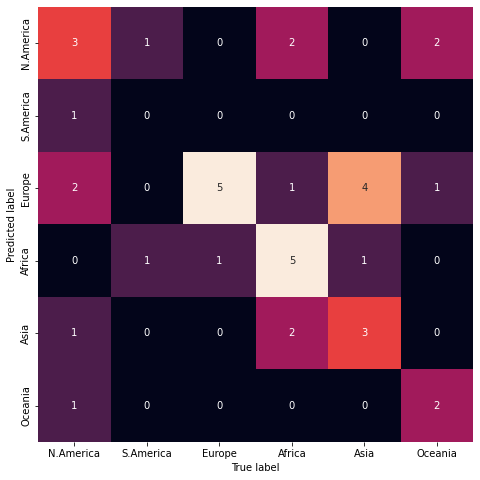

In [20]:
# Defining plotting parameters and plotting confusion matrix 
matrix = confusion_matrix(y_test, ys_test_pred_sn)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, ax=ax)
ax.yaxis.set_ticklabels(['N.America','S.America','Europe','Africa','Asia','Oceania'])
ax.xaxis.set_ticklabels(['N.America','S.America','Europe','Africa','Asia','Oceania'])
plt.xlabel('True label')
plt.ylabel('Predicted label')

Export the model to saved_model folder for stacking:

In [22]:
joblib.dump(knn_clf_sn, 'saved_model/knn.pkl')

['saved_model/knn.pkl']